### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data.csv')
df.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [ ]:
# Checamos cuantos valores diferentes tiene la variable Escolaridad
n = len(df['Escolaridad'].unique())

# Analizamos el limite en caso de que n sea par o impar y tambien tenemos que analizar el paso en el mismo caso par o impar

lim = n - 1 if n % 2 == 0 else (n - 1) // 2 
step = 2 if n % 2 == 0 else 1
x = range(0, (lim ** 2) + 1, step)
list(x)

[0, 1, 2, 3, 4]

In [ ]:
# Analizamos los valores unicos de la variable "Escolaridad"

cat = df['Escolaridad'].unique()
cat

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [ ]:
# Ordenamos la Variale "Escolaridad"

esc_ord = np.concatenate([[cat[2]], [cat[1]], [cat[-1]], [cat[0]],[cat[-2]]])
esc_ord

array(['Preparatoria', 'Secundaria', 'Primaria', 'Primaria trunca',
       'Sin escolaridad'], dtype='<U15')

In [ ]:
# Codificacio de la variable "Escolaridad" el termino a2 define la concavidad de la parabola -1 para abajo 1 para arriba

a2=-1 
a1=0
a0=-a2/n*np.sum([i**2 for i in x]) #Hacemos la a0 dependiente de a2 para que siempre sume 0
esc_cuad = {categorías:a0+a1*i+a2*i**2 for categorías, i in zip(esc_ord,x)}
esc_cuad

{'Preparatoria': 6.0,
 'Secundaria': 5.0,
 'Primaria': 2.0,
 'Primaria trunca': -3.0,
 'Sin escolaridad': -10.0}

In [ ]:
# comprabamos y la suma de los valores debe de ser cero

np.sum(list(esc_cuad.values()))

0.0

In [ ]:
# Mapeo de la variable "Escolaridad"

df['esc_cuad'] = df['Escolaridad'].map(esc_cuad)
df.head(5)

,Escolaridad,No. de hijos,esc_cuad
0,Primaria trunca,9,-3.0
1,Secundaria,3,5.0
2,Preparatoria,2,6.0
3,Sin escolaridad,3,-10.0
4,Primaria,2,2.0


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

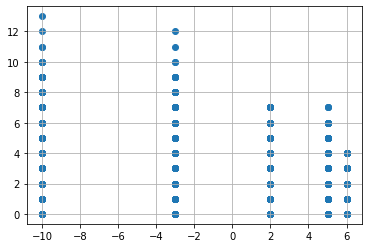

In [ ]:
from IPython.core.magics.extension import line_magic
# crear modelo de regresión lineal

LN = LinearRegression().fit(df[['esc_cuad']], df['No. de hijos'])

# graficar puntos y recta de regresión
plt.scatter(df['esc_cuad'], df['No. de hijos'])
plt.grid()

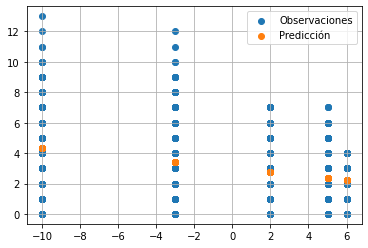

In [ ]:
#Graficamos la predicción
y_pred = LN.predict(df[['esc_cuad']])
plt.scatter(df['esc_cuad'],df['No. de hijos'], label='Observaciones')
plt.scatter(df['esc_cuad'],y_pred, label='Predicción')
plt.legend()
plt.grid()